In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

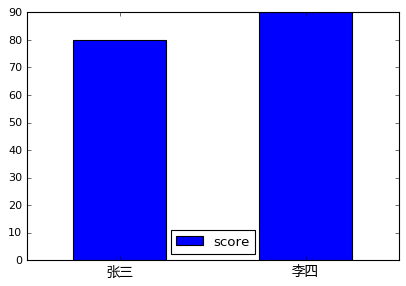

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定
#font = FontProperties(fname="/home/gezi/soft/simsunttc/simsun.ttc", size=12)  #size可不用指定

# linux 的中文字体 /usr/share/fonts/simhei/simhei.ttf

df = DataFrame({"score":[80, 90]}, index=["张三","李四"]) 
ax = df.plot(kind = 'bar', rot = 0) 
labels = [label.decode("utf-8") for label in df.index.values] 
ax.set_xticklabels(labels, fontproperties=font) 
plt.show()

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/rnn/', '')

flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn/', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True)
  print('text_ids', text_ids)

  #seq_len = 50	

  #print('words', words)
  argmax_encode = predictor.inference(['text_importance'], 
                                    feed_dict= {
                                      'rnn/main/text:0': [text_ids]
                                      })
  #print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=True, append_start=True, append_end=True)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  y = [100.0*n/np.sum(argmaxs) for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  for word, score in zip(words, y):
    print(word, score)
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/model.ckpt-24.6-38000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/model.ckpt-24.6-38000


import graph ok /home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/model.ckpt-24.6-38000.meta
restore ok /home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/model.ckpt-24.6-38000


text_ids [541, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 541, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [22, 56, 28] 106 3
美女
<S> 20.7547169811
美女 52.8301886792
</S> 26.4150943396


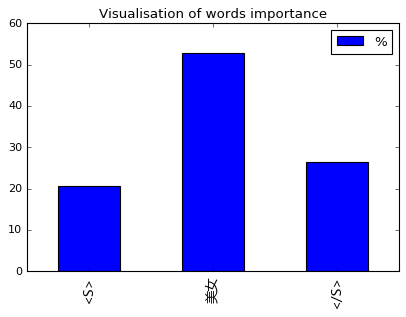

text_ids [3396, 1239, 8338, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3396, 1239, 8338, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [10, 30, 15, 46, 10] 111 5
帅哥戴墨镜
<S> 9.00900900901
帅哥 27.027027027
戴 13.5135135135
墨镜 41.4414414414
</S> 9.00900900901


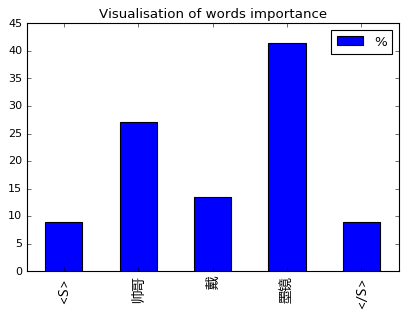

text_ids [3798, 1536, 5, 977, 1512, 890, 11, 76, 582, 11, 6814, 28, 11, 24860, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3798, 1536, 5, 977, 1512, 890, 11, 76, 582, 11, 6814, 28, 11, 24860, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [6, 11, 29, 1, 3, 6, 21, 2, 2, 8, 1, 8, 1, 3, 6, 6] 114 16
初中孩子的免费精品课，用手机，在家上，省心
<S> 5.26315789474
初中 9.64912280702
孩子 25.4385964912
的 0.877192982456
免费 2.63157894737
精品 5.26315789474
课 18.4210526316
， 1.75438596491
用 1.75438596491
手机 7.01754385965
， 0.877192982456
在家 7.01754385965
上 0.877192982456
， 2.63157894737
省心 5.26315789474
</S> 5.26315789474


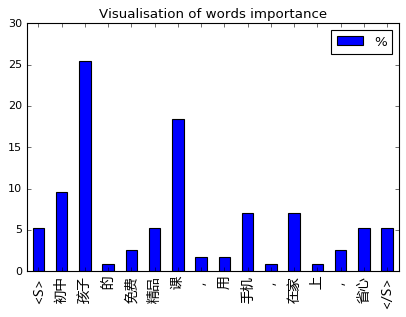

text_ids [78, 76, 984, 950, 46, 898, 18, 13911, 11, 2912, 582, 2202, 648, 898, 5915, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 78, 76, 984, 950, 46, 898, 18, 13911, 11, 2912, 582, 2202, 648, 898, 5915, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [7, 5, 6, 10, 4, 3, 3, 3, 8, 2, 3, 12, 7, 7, 8, 15, 7] 110 17
好用颜值高才是王道，这些手机现在买才实惠
<S> 6.36363636364
好 4.54545454545
用 5.45454545455
颜 9.09090909091
值 3.63636363636
高 2.72727272727
才 2.72727272727
是 2.72727272727
王道 7.27272727273
， 1.81818181818
这些 2.72727272727
手机 10.9090909091
现在 6.36363636364
买 6.36363636364
才 7.27272727273
实惠 13.6363636364
</S> 6.36363636364


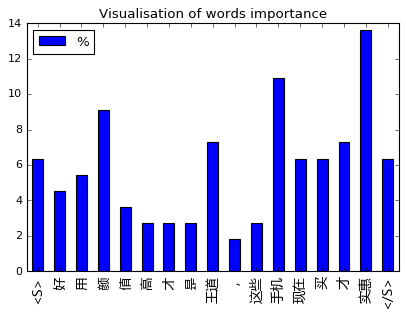

In [7]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

text_ids [324, 4374, 200, 10484, 596, 10918, 105, 20, 4485, 535, 8092, 3639, 655, 8, 1414, 240, 5065, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 324, 4374, 200, 10484, 596, 10918, 105, 20, 4485, 535, 8092, 3639, 655, 8, 1414, 240, 5065, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [5, 6, 16, 6, 7, 5, 6, 2, 1, 4, 7, 9, 7, 8, 1, 1, 4, 19, 9] 123 19
比信用卡分期更划算！有身份证就能申请10-30万贷款
<S> 4.06504065041
比 4.87804878049
信用 13.0081300813
卡 4.87804878049
分期 5.69105691057
更 4.06504065041
划算 4.87804878049
！ 1.62601626016
有 0.813008130081
身份 3.25203252033
证 5.69105691057
就能 7.31707317073
申请 5.69105691057
10 6.50406504065
- 0.813008130081
30 0.813008130081
万 3.25203252033
贷款 15.4471544715
</S> 7.31707317073


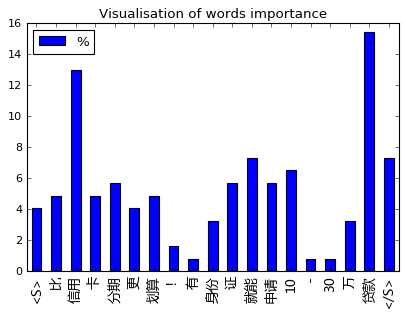

text_ids [6, 186, 12333, 482, 11784, 328, 167, 18, 3031, 39, 21, 36, 4057, 27, 2965, 648, 542, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 6, 186, 12333, 482, 11784, 328, 167, 18, 3031, 39, 21, 36, 4057, 27, 2965, 648, 542, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [9, 4, 8, 11, 6, 21, 2, 8, 0, 10, 1, 2, 3, 6, 3, 6, 6, 1, 8] 115 19
1890元往返飞旧金山?真是赚了,我一直在这里买!
<S> 7.82608695652
<NUM> 3.47826086957
元 6.95652173913
往返 9.5652173913
飞 5.21739130435
旧金山 18.2608695652
? 1.73913043478
真 6.95652173913
是 0.0
赚 8.69565217391
了 0.869565217391
, 1.73913043478
我 2.60869565217
一直 5.21739130435
在 2.60869565217
这里 5.21739130435
买 5.21739130435
! 0.869565217391
</S> 6.95652173913


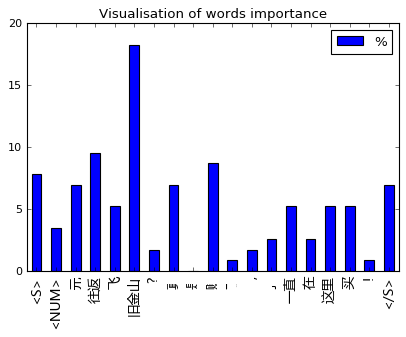

text_ids [206, 898, 18, 5881, 729, 296, 7069, 5, 4822, 4356, 3261, 105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 206, 898, 18, 5881, 729, 296, 7069, 5, 4822, 4356, 3261, 105, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [5, 8, 7, 2, 12, 4, 3, 20, 0, 7, 12, 16, 1, 9] 106 14
这才是上班族修本科的正确打开方式！
<S> 4.71698113208
这 7.54716981132
才 6.60377358491
是 1.88679245283
上班 11.320754717
族 3.77358490566
修 2.83018867925
本科 18.8679245283
的 0.0
正确 6.60377358491
打开 11.320754717
方式 15.0943396226
！ 0.943396226415
</S> 8.49056603774


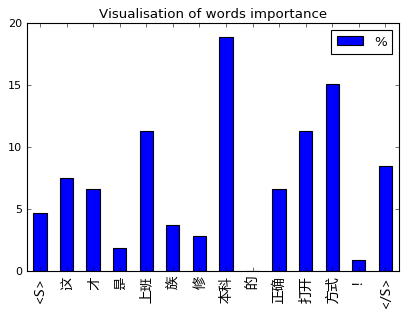

In [8]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

text_ids [2734, 133, 1241, 29, 216, 863, 644, 1041, 21, 2912, 10439, 257, 107, 11104, 7776, 2230, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2734, 133, 1241, 29, 216, 863, 644, 1041, 21, 2912, 10439, 257, 107, 11104, 7776, 2230, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [8, 11, 0, 5, 1, 2, 5, 18, 6, 2, 5, 10, 1, 3, 6, 5, 16, 9] 113 18
国庆到成都不要住酒店啦,这些民宿带你领略别样风情
<S> 7.0796460177
国庆 9.73451327434
到 0.0
成都 4.42477876106
不 0.884955752212
要 1.76991150442
住 4.42477876106
酒店 15.9292035398
啦 5.30973451327
, 1.76991150442
这些 4.42477876106
民宿 8.84955752212
带 0.884955752212
你 2.65486725664
领略 5.30973451327
别样 4.42477876106
风情 14.1592920354
</S> 7.96460176991


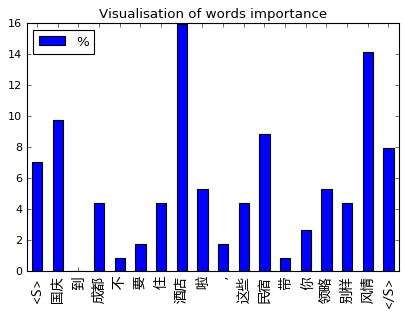

text_ids [16322, 342, 582, 328, 29, 365, 16322, 43, 2049, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 16322, 342, 582, 328, 29, 365, 16322, 43, 2049, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [6, 11, 10, 12, 0, 0, 6, 10, 5, 43, 7] 110 11
低头玩手机?不如低头学英语
<S> 5.45454545455
低头 10.0
玩 9.09090909091
手机 10.9090909091
? 0.0
不 0.0
如 5.45454545455
低头 9.09090909091
学 4.54545454545
英语 39.0909090909
</S> 6.36363636364


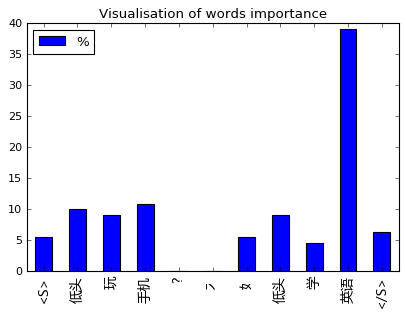

text_ids [3396, 105, 544, 14086, 27, 36, 2965, 1251, 418, 20, 3020, 777, 105, 214, 499, 294, 533, 320, 25, 15873, 3198, 435, 20, 4489, 4480, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3396, 105, 544, 14086, 27, 36, 2965, 1251, 418, 20, 3020, 777, 105, 214, 499, 294, 533, 320, 25, 15873, 3198, 435, 20, 4489, 4480, 107, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [6, 18, 0, 8, 16, 4, 1, 1, 1, 2, 3, 2, 1, 0, 1, 4, 2, 2, 3, 2, 5, 3, 3, 0, 11, 8, 4, 3] 114 28
帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你
<S> 5.26315789474
帅哥 15.7894736842
！ 0.0
世界 7.01754385965
名表 14.0350877193
在 3.50877192982
我 0.877192982456
这里 0.877192982456
并 0.877192982456
没 1.75438596491
有 2.63157894737
这么 1.75438596491
贵 0.877192982456
！ 0.0
加 0.877192982456
微 3.50877192982
信 1.75438596491
送 1.75438596491
3 2.63157894737
年 1.75438596491
保修 4.38596491228
里面 2.63157894737
总 2.63157894737
有 0.0
一款 9.64912280702
属于 7.01754385965
你 3.50877192982
</S> 2.631578947

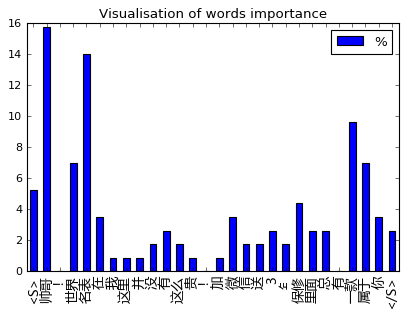

text_ids [2051, 19804, 10, 286, 10, 2049, 1130, 554, 890, 21, 454, 1536, 13853, 109, 28, 2049, 542, 17280, 186, 11419, 890, 977, 8100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2051, 19804, 10, 286, 10, 2049, 1130, 554, 890, 21, 454, 1536, 13853, 109, 28, 2049, 542, 17280, 186, 11419, 890, 977, 8100, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [7, 4, 10, 0, 1, 2, 13, 7, 4, 12, 2, 2, 12, 3, 0, 0, 9, 1, 5, 3, 3, 9, 5, 7, 5] 126 25
精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取
<S> 5.55555555556
精彩 3.1746031746
外教 7.93650793651
一 0.0
对 0.793650793651
一 1.5873015873
英语 10.3174603175
主题 5.55555555556
活动 3.1746031746
课 9.52380952381
, 1.5873015873
让 1.5873015873
孩子 9.52380952381
从此 2.38095238095
爱 0.0
上 0.0
英语 7.14285714286
! 0.793650793651
288 3.96825396825
元 2.38095238095
试听 2.38095238095
课 7.14285714286
免费 3.96825396825
领取 5.55555555556
</S> 3.96825396825


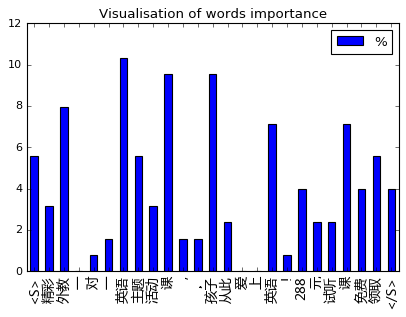

In [9]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

text_ids [9478, 5958, 43, 136, 2429, 328, 43, 7357, 591, 4143, 21, 458, 133, 307, 202, 29, 2611, 105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 9478, 5958, 43, 136, 2429, 328, 43, 7357, 591, 4143, 21, 458, 133, 307, 202, 29, 2611, 105, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [3, 11, 6, 5, 1, 3, 0, 5, 27, 5, 21, 2, 3, 1, 3, 1, 2, 4, 2, 9] 114 20
打工回来学点啥?学厨师当老板,走到哪都不怕！
<S> 2.63157894737
打工 9.64912280702
回来 5.26315789474
学 4.38596491228
点 0.877192982456
啥 2.63157894737
? 0.0
学 4.38596491228
厨师 23.6842105263
当 4.38596491228
老板 18.4210526316
, 1.75438596491
走 2.63157894737
到 0.877192982456
哪 2.63157894737
都 0.877192982456
不 1.75438596491
怕 3.50877192982
！ 1.75438596491
</S> 7.89473684211


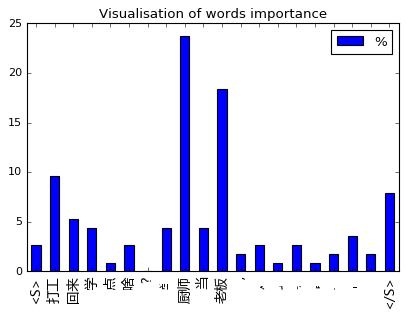

text_ids [12327, 1604, 21, 148, 1148, 7357, 21, 5434, 19136, 2824, 542, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 12327, 1604, 21, 148, 1148, 7357, 21, 5434, 19136, 2824, 542, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [7, 21, 19, 5, 0, 5, 18, 0, 7, 11, 14, 2, 7] 116 13
水饺加盟,无需厨师,总部扶持创业!
<S> 6.03448275862
水饺 18.1034482759
加盟 16.3793103448
, 4.31034482759
无 0.0
需 4.31034482759
厨师 15.5172413793
, 0.0
总部 6.03448275862
扶持 9.48275862069
创业 12.0689655172
! 1.72413793103
</S> 6.03448275862


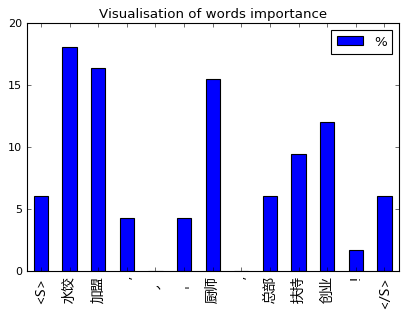

text_ids [12327, 1604, 21, 148, 1148, 7357, 21, 5434, 19136, 2824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 12327, 1604, 21, 148, 1148, 7357, 21, 5434, 19136, 2824, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [7, 20, 19, 5, 0, 6, 17, 0, 8, 14, 14, 8] 118 12
水饺加盟,无需厨师,总部扶持创业
<S> 5.93220338983
水饺 16.9491525424
加盟 16.1016949153
, 4.23728813559
无 0.0
需 5.08474576271
厨师 14.406779661
, 0.0
总部 6.77966101695
扶持 11.8644067797
创业 11.8644067797
</S> 6.77966101695


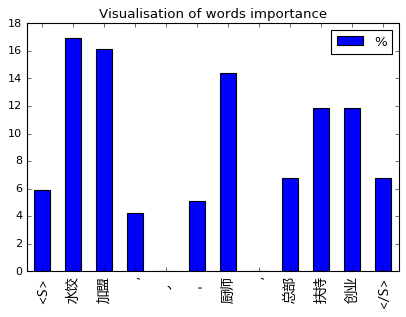

In [10]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

text_ids [2368, 6732, 1873, 50, 46, 457, 467, 145, 1146, 455, 661, 39, 105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2368, 6732, 1873, 50, 46, 457, 467, 145, 1146, 455, 661, 39, 105, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [6, 18, 16, 21, 4, 2, 5, 2, 1, 7, 2, 8, 4, 1, 12] 109 15
iPhone隐藏功能：高铁也能在线选座了！
<S> 5.50458715596
iphone 16.5137614679
隐藏 14.6788990826
功能 19.2660550459
： 3.66972477064
高 1.83486238532
铁 4.5871559633
也 1.83486238532
能 0.917431192661
在线 6.42201834862
选 1.83486238532
座 7.33944954128
了 3.66972477064
！ 0.917431192661
</S> 11.0091743119


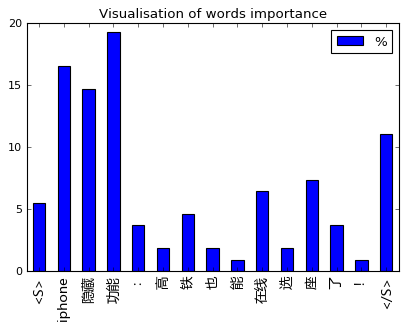

In [11]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

text_ids [4025, 436, 506, 15822, 1298, 16191, 21, 11104, 11564, 5, 3926, 21, 454, 5749, 935, 28, 1298, 6581, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 4025, 436, 506, 15822, 1298, 16191, 21, 11104, 11564, 5, 3926, 21, 454, 5749, 935, 28, 1298, 6581, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [4, 14, 6, 5, 10, 9, 16, 0, 2, 5, 1, 5, 1, 0, 4, 2, 1, 6, 14, 5] 110 20
携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀
<S> 3.63636363636
携手 12.7272727273
欧 5.45454545455
歌 4.54545454545
步入 9.09090909091
音乐 8.18181818182
殿堂 14.5454545455
, 0.0
领略 1.81818181818
ta 4.54545454545
的 0.909090909091
神奇 4.54545454545
, 0.909090909091
让 0.0
心灵 3.63636363636
插 1.81818181818
上 0.909090909091
音乐 5.45454545455
翅膀 12.7272727273
</S> 4.54545454545


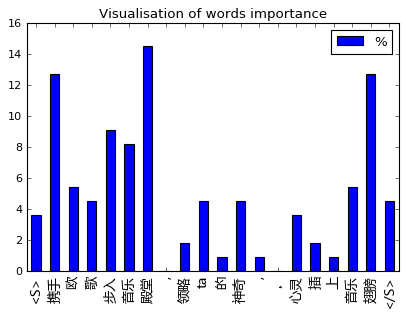

In [12]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

text_ids [17437, 4510, 644, 973, 21, 1640, 6213, 83, 21, 865, 994, 65, 3, 1973, 967, 5, 10171, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 17437, 4510, 644, 973, 21, 1640, 6213, 83, 21, 865, 994, 65, 3, 1973, 967, 5, 10171, 33, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [6, 13, 7, 25, 9, 0, 11, 4, 7, 1, 5, 1, 2, 1, 3, 3, 0, 9, 1, 7] 115 20
底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.
<S> 5.21739130435
底价 11.3043478261
预订 6.08695652174
酒店 21.7391304348
服务 7.82608695652
, 0.0
交通 9.5652173913
便利 3.47826086957
设 6.08695652174
, 0.869565217391
施 4.34782608696
齐 0.869565217391
全 1.73913043478
  0.869565217391
欢迎 2.60869565217
您 2.60869565217
的 0.0
光临 7.82608695652
. 0.869565217391
</S> 6.08695652174


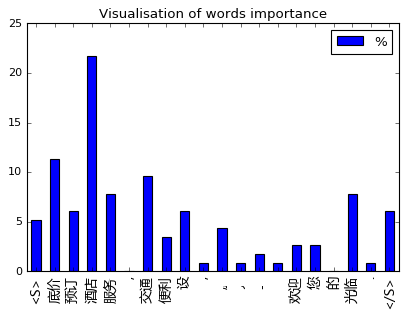

In [13]:
predict('底价预订酒店服务,交通便利设,施齐全 欢迎您的光临.')

text_ids [6164, 3373, 287, 5216, 644, 1210, 21, 10, 286, 10, 3373, 1210, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 6164, 3373, 287, 5216, 644, 1210, 21, 10, 286, 10, 3373, 1210, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [4, 16, 22, 1, 7, 22, 13, 2, 1, 5, 1, 12, 12, 7] 125 14
巨人游泳五星级酒店培训,一对一游泳培训
<S> 3.2
巨人 12.8
游泳 17.6
五 0.8
星级 5.6
酒店 17.6
培训 10.4
, 1.6
一 0.8
对 4.0
一 0.8
游泳 9.6
培训 9.6
</S> 5.6


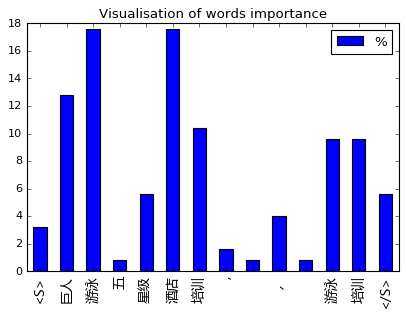

In [14]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

text_ids [1819, 2006, 202, 454, 1536, 120, 4924, 17067, 43, 2049, 360, 1536, 6867, 10724, 363, 335, 376, 2049, 11, 6252, 1414, 53, 105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1819, 2006, 202, 454, 1536, 120, 4924, 17067, 43, 2049, 360, 1536, 6867, 10724, 363, 335, 376, 2049, 11, 6252, 1414, 53, 105, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [6, 3, 10, 1, 3, 14, 1, 2, 2, 2, 11, 1, 12, 11, 6, 9, 2, 1, 12, 0, 3, 1, 3, 0, 4] 120 25
为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！
<S> 5.0
为什么 2.5
妈妈 8.33333333333
都 0.833333333333
让 2.5
孩子 11.6666666667
来 0.833333333333
vip 1.66666666667
jr 1.66666666667
学 1.66666666667
英语 9.16666666667
？ 0.833333333333
孩子 10.0
大胆 9.16666666667
开口 5.0
流 7.5
利 1.66666666667
说 0.833333333333
英语 10.0
， 0.0
只要 2.5
30 0.833333333333
天 2.5
！ 0.0
</S> 3.33333333333


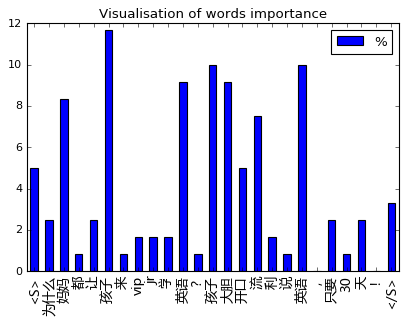

In [15]:
predict('为什么妈妈都让孩子来vipjr学英语？孩子大胆开口流利说英语，只要30天！')